In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Train & test split

In [2]:
df = pd.read_csv("../result_data/final_bosung.csv")
df.head()

,mssv,gioitinh,hedt_ CLC,hedt_ CNTN,hedt_ CQUI,hedt_ CTTT,hedt_ KSTN,khoa_CNPM,khoa_HTTT,khoa_KHMT,...,namhoc,sotchk,hocky_sx,dtbtl,drltl,dtbhk_truoc,drlhk_truoc,sotctl,somon_khongdat_hktruoc,xeploai
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2013,18,2,6.020000,5.0,6.02,5.0,22.0,1.0,2
1,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2014,26,3,6.525000,4.0,7.03,3.0,40.0,0.0,1
2,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2014,19,4,6.483333,4.0,6.40,3.0,66.0,1.0,2
3,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2015,20,5,6.615000,4.0,7.01,4.0,85.0,0.0,1
4,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2015,19,6,6.562000,4.0,6.35,5.0,105.0,1.0,1


In [3]:
df.columns

Index(['mssv', 'gioitinh', 'hedt_ CLC', 'hedt_ CNTN', 'hedt_ CQUI',
       'hedt_ CTTT', 'hedt_ KSTN', 'khoa_CNPM', 'khoa_HTTT', 'khoa_KHMT',
       'khoa_KTMT', 'khoa_KTTT', 'khoa_MMT&TT', 'khoahoc', 'xl_tt',
       'khuvuc_1.0', 'khuvuc_2.0', 'khuvuc_3.0', 'khuvuc_4.0', 'khuvuc_5.0',
       'khuvuc_6.0', 'khuvuc_7.0', 'xl_av', 'hocky', 'namhoc', 'sotchk',
       'hocky_sx', 'dtbtl', 'drltl', 'dtbhk_truoc', 'drlhk_truoc', 'sotctl',
       'somon_khongdat_hktruoc', 'xeploai'],
      dtype='object')

In [4]:
df.shape

(56185, 34)

In [5]:
df.xeploai.value_counts()

2    31066
1    16414
0     8705
Name: xeploai, dtype: int64

In [6]:
# Tập test là năm 2021
df_test = df[df["namhoc"]>=2021]
df_test.shape[0]/df.shape[0]

0.15726617424579514

In [7]:
# Tập train từ 2020 trở về trước
df_train = df[df["namhoc"]<2021]
df_train.shape[0]/df.shape[0]

0.8427338257542049

# Visualize

## Histogram

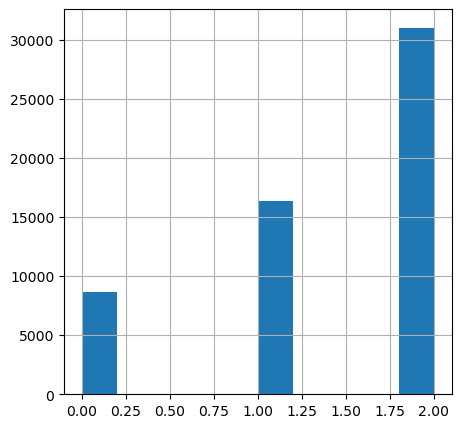

In [8]:
df.xeploai.hist(figsize=(5, 5));

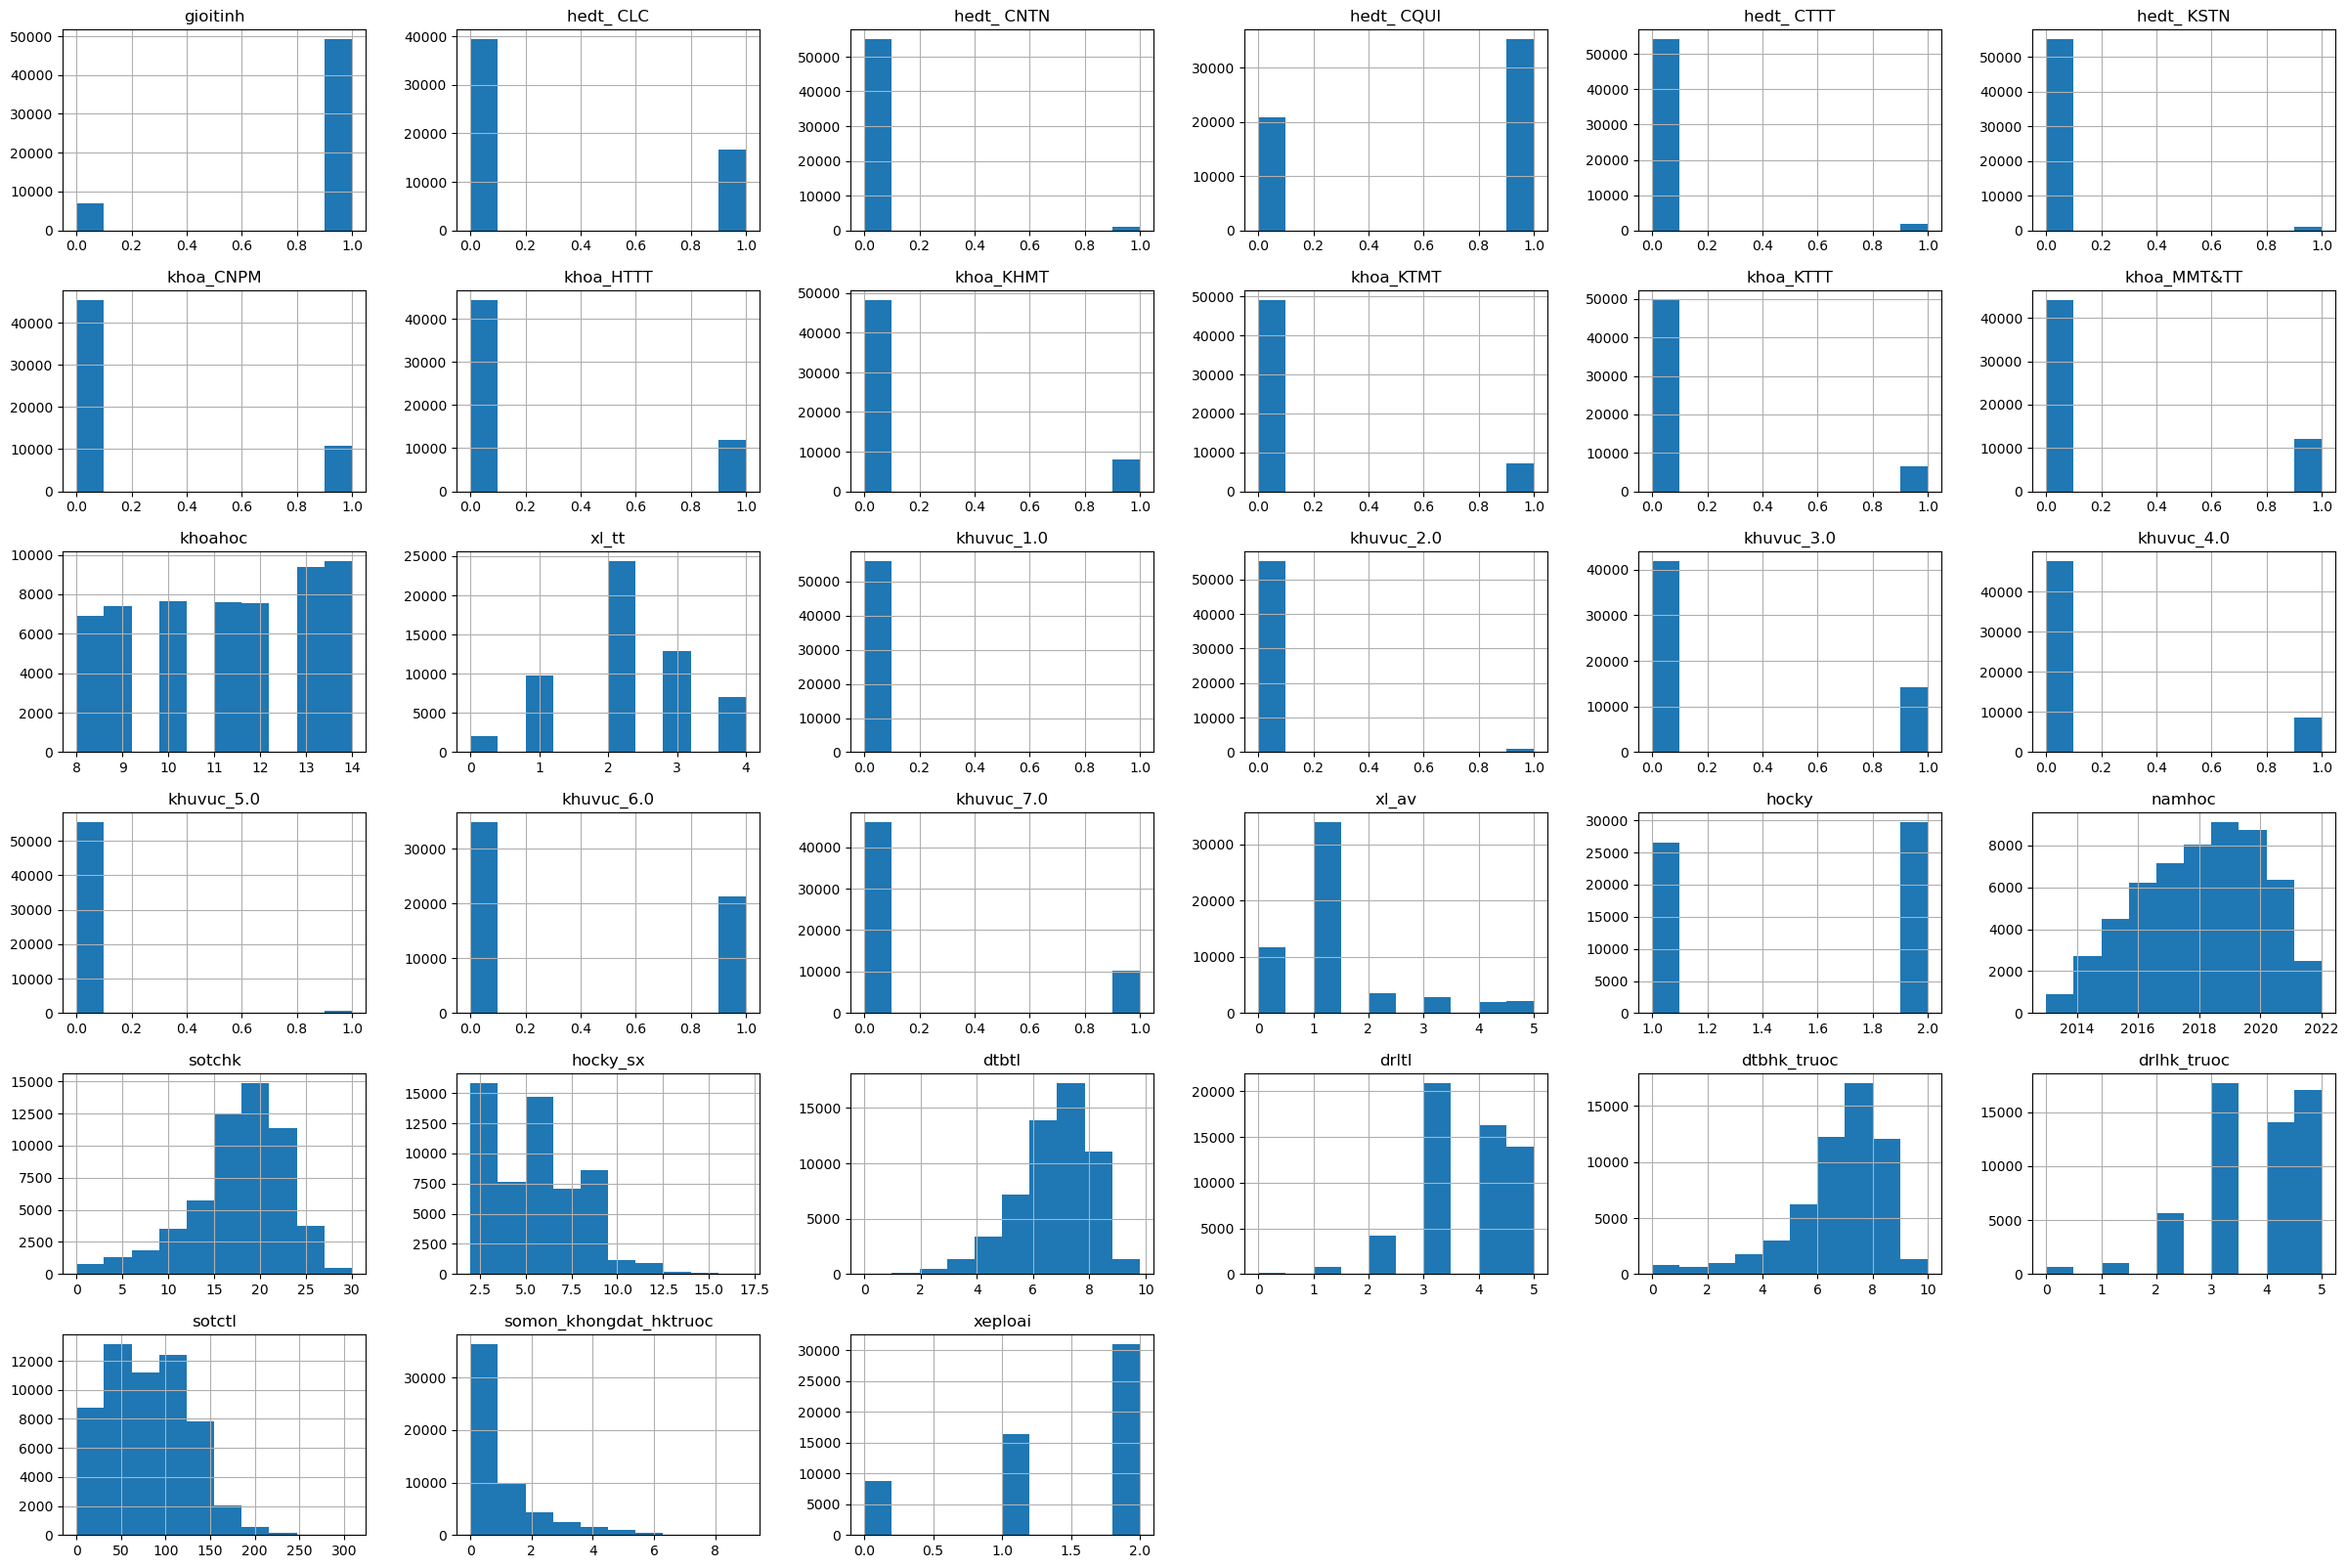

In [13]:
df.hist(figsize=(30,20));

## Heatmap

Text(0.5, 1.0, 'correlation of feature')

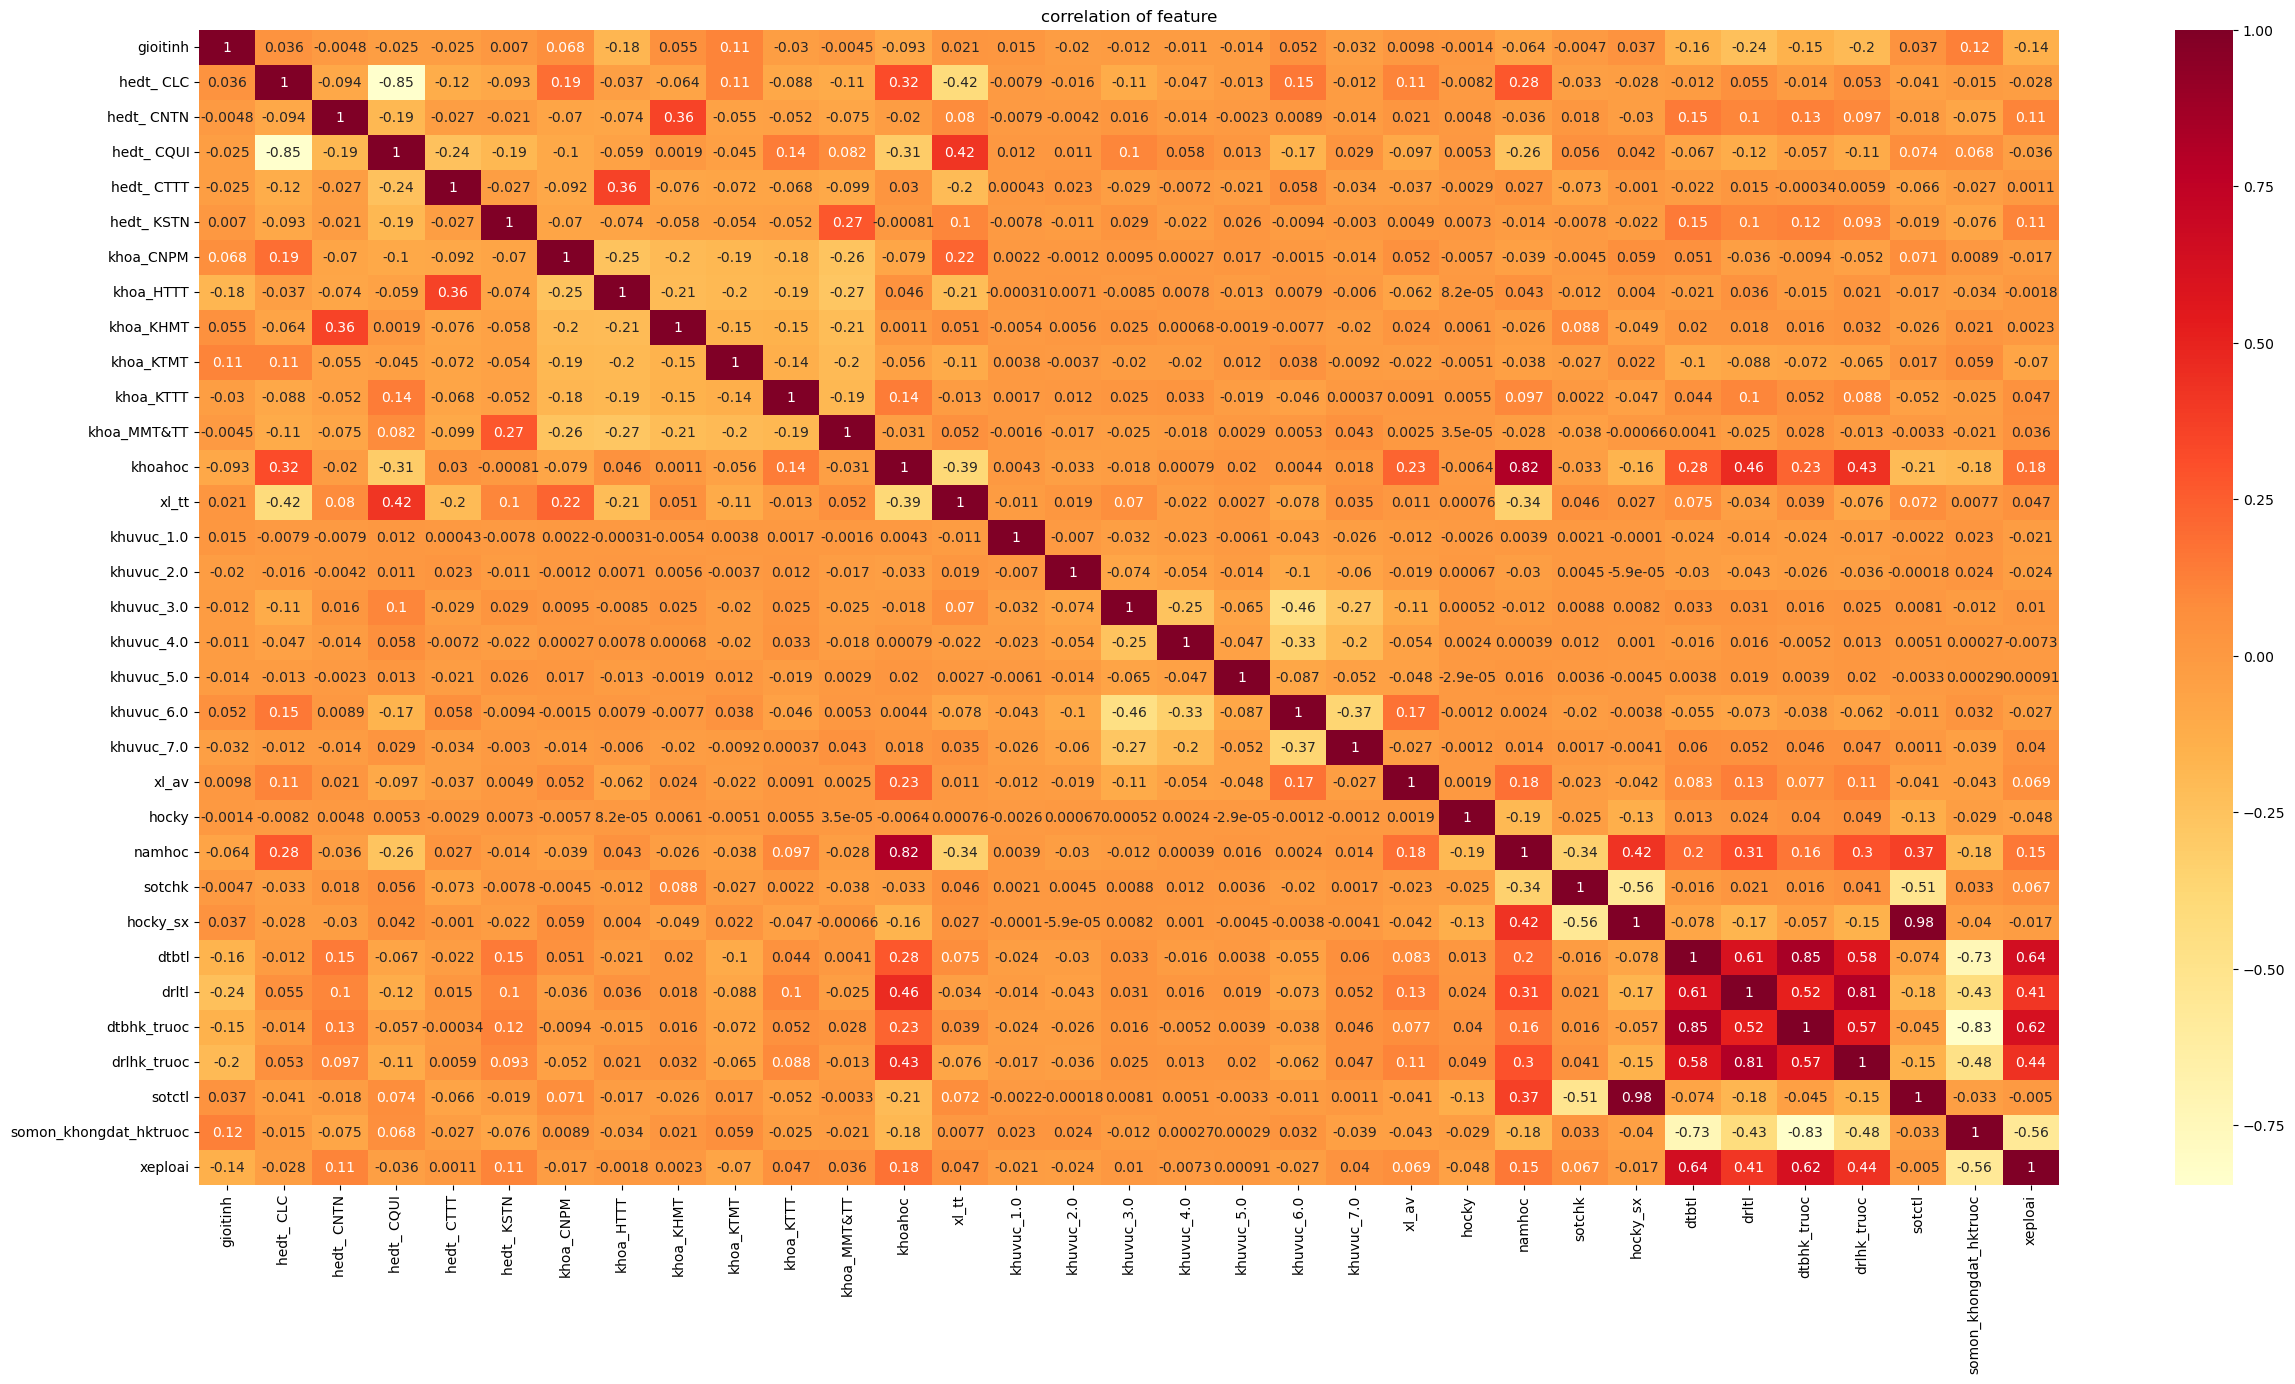

In [14]:
plt.figure(figsize=(30,15))
sn.heatmap(df.select_dtypes(include=['float', 'int']).corr(), annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

## Correlation

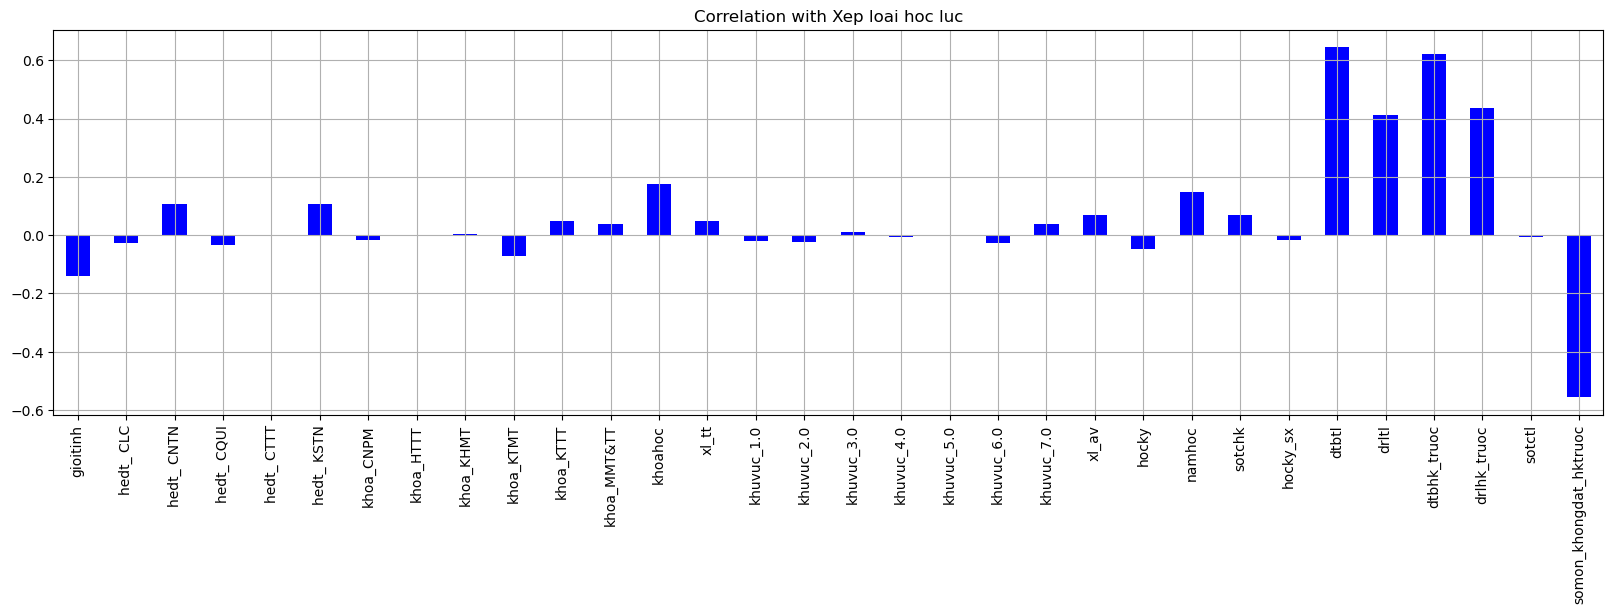

In [15]:
df.select_dtypes(include=['float', 'int']).drop("xeploai", axis=1).corrwith(df["xeploai"]).plot(kind='bar', grid=True, figsize=(20, 5)
, title="Correlation with Xep loai hoc luc", color="Blue");

# Xác định thuộc tính đưa vào mô hình

In [9]:
# Khu vực
khuvuc = [col for col in df.columns if col.startswith("khuvuc")]

# Khoa
khoa = [col for col in df.columns if col.startswith("khoa_")]

# Hệ đào tạo
hedt = [col for col in df.columns if col.startswith("hedt")]

# Thuộc tính đầu vào
input = ["gioitinh", "hedt_ CNTN", "hedt_ KSTN", "khoahoc"] + ["namhoc", "dtbtl", "drltl", "dtbhk_truoc", "drlhk_truoc", "somon_khongdat_hktruoc"]

# Output
output = "xeploai"

# Mô hình

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [11]:
# Data preparation
X_train, X_test = df_train[input], df_test[input]
y_train, y_test = df_train[output], df_test[output]

In [21]:
X_train.columns

Index(['gioitinh', 'hedt_ CNTN', 'hedt_ KSTN', 'khoahoc', 'namhoc', 'dtbtl',
       'drltl', 'dtbhk_truoc', 'drlhk_truoc', 'somon_khongdat_hktruoc'],
      dtype='object')

# Hàm cần thiết

In [12]:
# confusion matrix
def plot_cm(y_test, y_pred):
    plt.figure(figsize=(5, 3))
    cm = confusion_matrix(y_test, y_pred)
    sn.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr")
    plt.xlabel('Predictions');
    plt.ylabel('Actuals');
    return cm

## Chưa cân bằng dữ liệu

### Logistic Regression

              precision    recall  f1-score   support

           0       0.67      0.25      0.37      1370
           1       0.88      0.98      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.77      0.61      0.65      8836
weighted avg       0.84      0.86      0.84      8836



array([[ 346, 1024],
       [ 173, 7293]], dtype=int64)

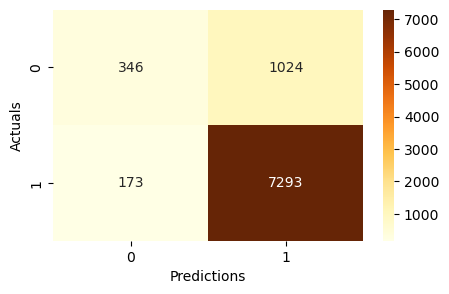

In [15]:
# fit model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### KNN

              precision    recall  f1-score   support

           0       0.63      0.32      0.43      1370
           1       0.89      0.97      0.92      7466

    accuracy                           0.87      8836
   macro avg       0.76      0.64      0.68      8836
weighted avg       0.85      0.87      0.85      8836



array([[ 443,  927],
       [ 259, 7207]], dtype=int64)

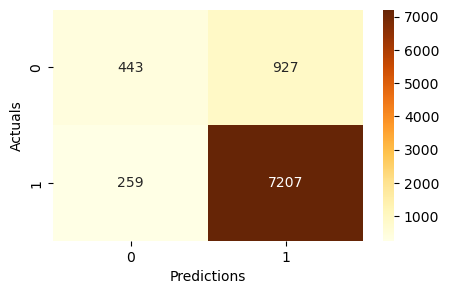

In [16]:
# fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Naive Bayes

              precision    recall  f1-score   support

           0       0.55      0.45      0.49      1370
           1       0.90      0.93      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.73      0.69      0.71      8836
weighted avg       0.85      0.86      0.85      8836



array([[ 612,  758],
       [ 494, 6972]], dtype=int64)

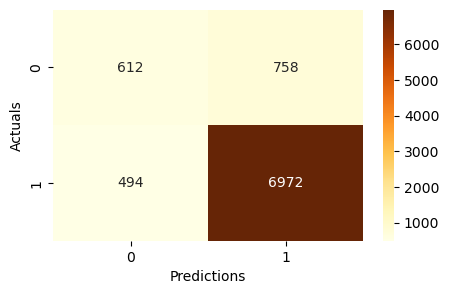

In [17]:
# fit model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predict
y_pred = gnb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### SVM

              precision    recall  f1-score   support

           0       0.59      0.40      0.48      1370
           1       0.90      0.95      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.74      0.67      0.70      8836
weighted avg       0.85      0.86      0.85      8836



array([[ 545,  825],
       [ 378, 7088]], dtype=int64)

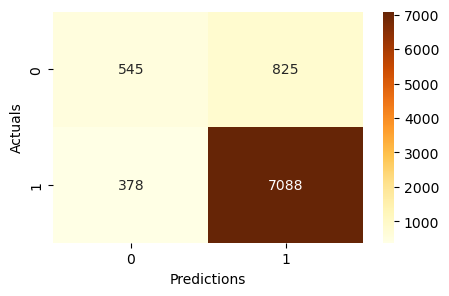

In [18]:
# fit model
svc = LinearSVC()
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.67      0.23      0.34      1370
           1       0.87      0.98      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.77      0.60      0.63      8836
weighted avg       0.84      0.86      0.83      8836



array([[ 310, 1060],
       [ 151, 7315]], dtype=int64)

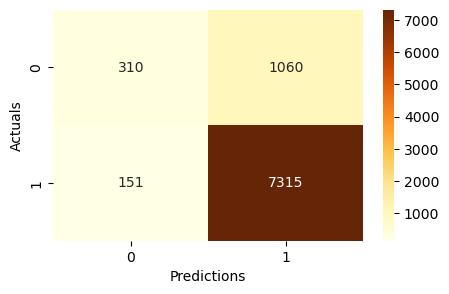

In [19]:
# fit model
svc = SVC()
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Decision Tree

              precision    recall  f1-score   support

           0       0.75      0.54      0.63      1370
           1       0.92      0.97      0.94      7466

    accuracy                           0.90      8836
   macro avg       0.83      0.75      0.78      8836
weighted avg       0.89      0.90      0.89      8836



array([[ 740,  630],
       [ 253, 7213]], dtype=int64)

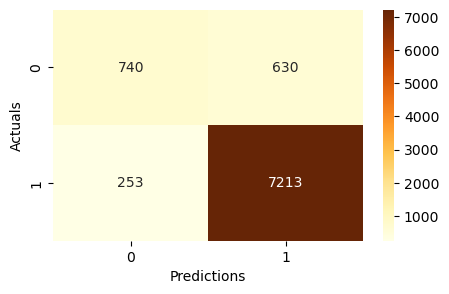

In [20]:
# fit model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)
dt.fit(X_train, y_train)

# predict
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Random Forest

              precision    recall  f1-score   support

           0       0.80      0.57      0.66      1370
           1       0.92      0.97      0.95      7466

    accuracy                           0.91      8836
   macro avg       0.86      0.77      0.81      8836
weighted avg       0.90      0.91      0.90      8836



array([[ 778,  592],
       [ 200, 7266]], dtype=int64)

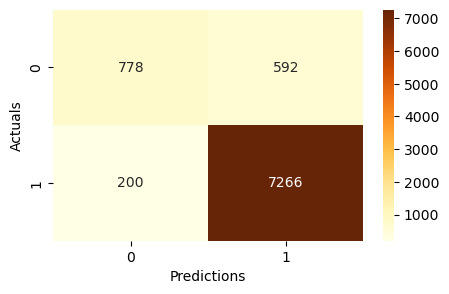

In [21]:
# fit model
rf = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=50, random_state=42)
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### MLP

              precision    recall  f1-score   support

           0       0.79      0.57      0.67      1370
           1       0.93      0.97      0.95      7466

    accuracy                           0.91      8836
   macro avg       0.86      0.77      0.81      8836
weighted avg       0.91      0.91      0.90      8836



array([[ 787,  583],
       [ 203, 7263]], dtype=int64)

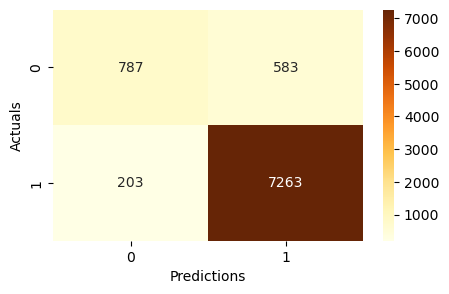

In [22]:
# fit model
clf = MLPClassifier(random_state=42).fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

## Cân bằng dữ liệu với RandomOverSampling

In [23]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

# Tạo mẫu ngẫu nhiên
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.53      0.42      0.47      1370
           1       0.38      0.41      0.39      1567
           2       0.83      0.85      0.84      5899

    accuracy                           0.71      8836
   macro avg       0.58      0.56      0.57      8836
weighted avg       0.70      0.71      0.70      8836



array([[ 578,  326,  466],
       [ 347,  643,  577],
       [ 168,  722, 5009]], dtype=int64)

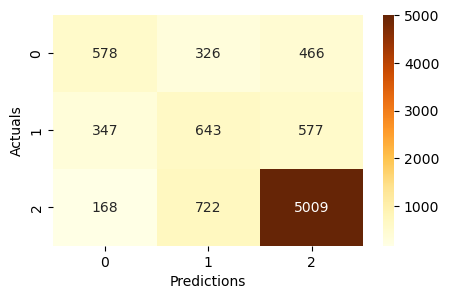

In [24]:
# fit model
lr = LogisticRegression()
lr.fit(X_train_ros, y_train_ros)

# predict
y_pred = lr.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### KNN

              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1370
           1       0.95      0.88      0.91      7466

    accuracy                           0.86      8836
   macro avg       0.74      0.81      0.76      8836
weighted avg       0.88      0.86      0.87      8836



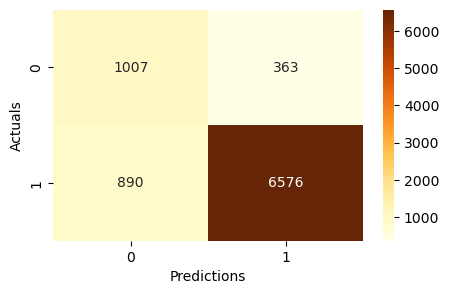

In [124]:
# fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_ros, y_train_ros)

# predict
y_pred = knn.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Naive Bayes

              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1370
           1       0.91      0.90      0.91      7466

    accuracy                           0.85      8836
   macro avg       0.71      0.72      0.72      8836
weighted avg       0.85      0.85      0.85      8836



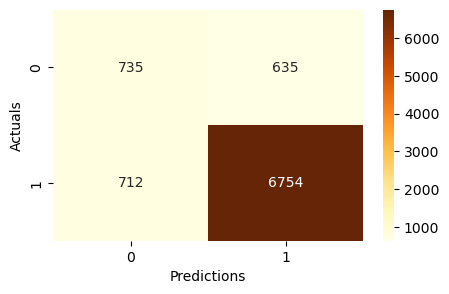

In [125]:
# fit model
gnb = GaussianNB()
gnb.fit(X_train_ros, y_train_ros)

# predict
y_pred = gnb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### SVM

              precision    recall  f1-score   support

           0       0.58      0.41      0.48      1370
           1       0.90      0.95      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.74      0.68      0.70      8836
weighted avg       0.85      0.86      0.85      8836



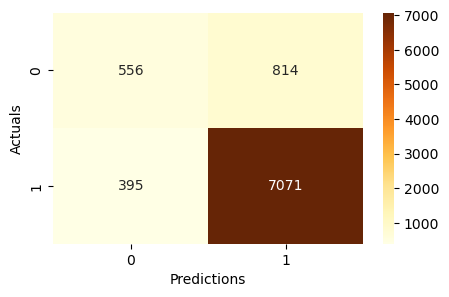

In [126]:
# fit model
svc = LinearSVC()
svc.fit(X_train_ros, y_train_ros)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.53      0.83      0.65      1370
           1       0.97      0.86      0.91      7466

    accuracy                           0.86      8836
   macro avg       0.75      0.85      0.78      8836
weighted avg       0.90      0.86      0.87      8836



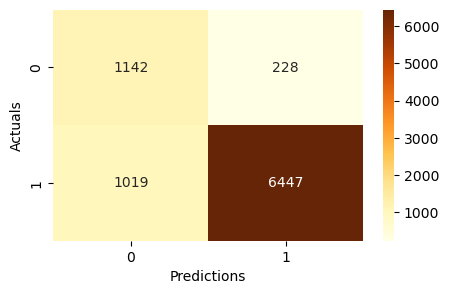

In [131]:
# fit model
svc = SVC(kernel="rbf")
svc.fit(X_train_ros, y_train_ros)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Decision Tree

              precision    recall  f1-score   support

           0       0.55      0.72      0.62      1370
           1       0.95      0.89      0.92      7466

    accuracy                           0.86      8836
   macro avg       0.75      0.81      0.77      8836
weighted avg       0.88      0.86      0.87      8836



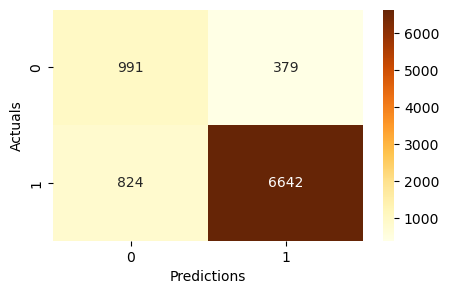

In [127]:
# fit model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)
dt.fit(X_train_ros, y_train_ros)

# predict
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Random Forest

              precision    recall  f1-score   support

           0       0.58      0.80      0.67      1370
           1       0.96      0.89      0.93      7466

    accuracy                           0.88      8836
   macro avg       0.77      0.85      0.80      8836
weighted avg       0.90      0.88      0.89      8836



<Axes: >

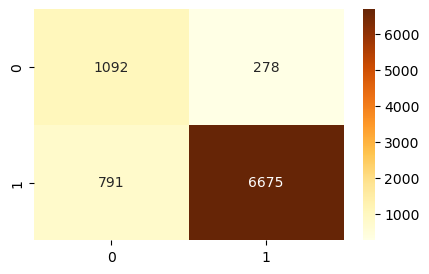

In [57]:
# fit model
rf = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=50, random_state=42)
rf.fit(X_train_ros, y_train_ros)

# predict
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### MLP

              precision    recall  f1-score   support

           0       0.52      0.86      0.65      1370
           1       0.97      0.85      0.91      7466

    accuracy                           0.85      8836
   macro avg       0.74      0.86      0.78      8836
weighted avg       0.90      0.85      0.87      8836



<Axes: >

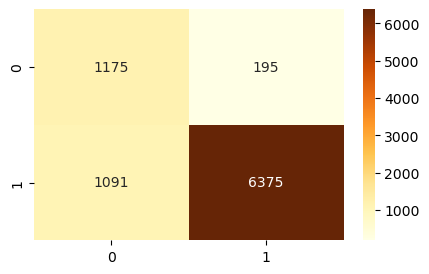

In [58]:
#fit model
mlp = MLPClassifier(random_state=42).fit(X_train_ros, y_train_ros)

# predict
y_pred = mlp.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

## Cân bằng dữ liệu với SMOTE

In [13]:
# Oversampling
from imblearn.over_sampling import SMOTE

# Tạo mẫu ngẫu nhiên
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [14]:
X_train_smote.columns

Index(['gioitinh', 'hedt_ CNTN', 'hedt_ KSTN', 'khoahoc', 'namhoc', 'dtbtl',
       'drltl', 'dtbhk_truoc', 'drlhk_truoc', 'somon_khongdat_hktruoc'],
      dtype='object')

In [15]:
X_train_smote['gioitinh'] = np.round(X_train_smote['gioitinh'])

In [16]:
X_train_smote['hedt_ CNTN'] = np.round(X_train_smote['hedt_ CNTN'])
X_train_smote['hedt_ KSTN'] = np.round(X_train_smote['hedt_ KSTN'])

In [17]:
X_train_smote['khoahoc'] = np.round(X_train_smote['khoahoc'])

In [18]:
X_train_smote['namhoc'] = np.round(X_train_smote['namhoc'])

In [19]:
X_train_smote['somon_khongdat_hktruoc'] = np.round(X_train_smote['somon_khongdat_hktruoc'])

### Logistic

              precision    recall  f1-score   support

           0       0.53      0.41      0.47      1370
           1       0.39      0.40      0.40      1567
           2       0.82      0.86      0.84      5899

    accuracy                           0.71      8836
   macro avg       0.58      0.56      0.57      8836
weighted avg       0.70      0.71      0.70      8836



array([[ 565,  329,  476],
       [ 330,  633,  604],
       [ 164,  671, 5064]], dtype=int64)

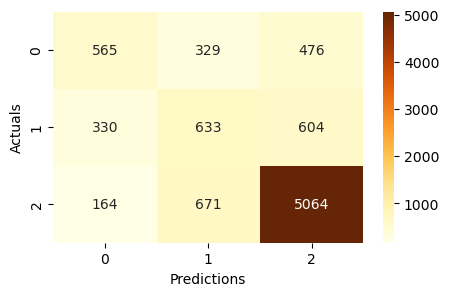

In [20]:
# fit model
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

# predict
y_pred = lr.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### KNN

              precision    recall  f1-score   support

           0       0.46      0.39      0.42      1370
           1       0.34      0.39      0.36      1567
           2       0.82      0.81      0.82      5899

    accuracy                           0.67      8836
   macro avg       0.54      0.53      0.53      8836
weighted avg       0.68      0.67      0.67      8836



array([[ 531,  361,  478],
       [ 370,  616,  581],
       [ 260,  843, 4796]], dtype=int64)

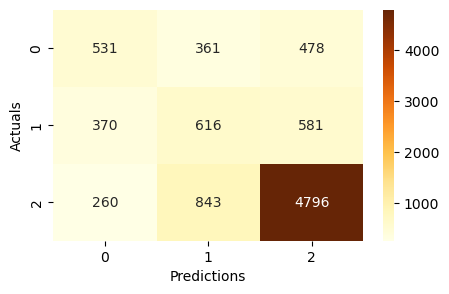

In [21]:
# fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# predict
y_pred = knn.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Naive Bayes

              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1370
           1       0.30      0.46      0.37      1567
           2       0.86      0.73      0.79      5899

    accuracy                           0.65      8836
   macro avg       0.55      0.56      0.55      8836
weighted avg       0.70      0.65      0.67      8836



array([[ 664,  358,  348],
       [ 458,  725,  384],
       [ 264, 1316, 4319]], dtype=int64)

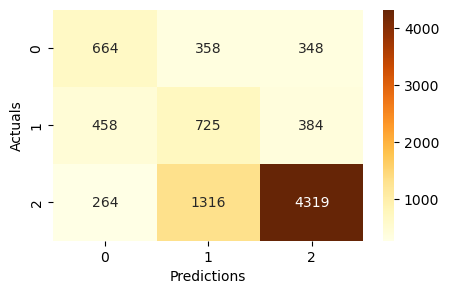

In [22]:
# fit model
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

# predict
y_pred = gnb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### SVM

              precision    recall  f1-score   support

           0       0.26      0.76      0.39      1370
           1       0.15      0.02      0.03      1567
           2       0.88      0.68      0.77      5899

    accuracy                           0.58      8836
   macro avg       0.43      0.49      0.40      8836
weighted avg       0.65      0.58      0.58      8836



array([[1047,   15,  308],
       [1273,   30,  264],
       [1714,  151, 4034]], dtype=int64)

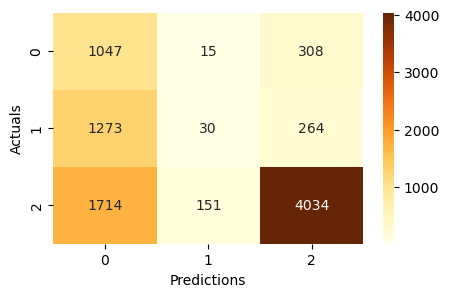

In [23]:
# fit model
svc = LinearSVC()
svc.fit(X_train_smote, y_train_smote)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Decision Tree

              precision    recall  f1-score   support

           0       0.50      0.41      0.45      1370
           1       0.38      0.37      0.37      1567
           2       0.82      0.86      0.84      5899

    accuracy                           0.70      8836
   macro avg       0.56      0.54      0.55      8836
weighted avg       0.69      0.70      0.69      8836



array([[ 558,  300,  512],
       [ 370,  580,  617],
       [ 186,  663, 5050]], dtype=int64)

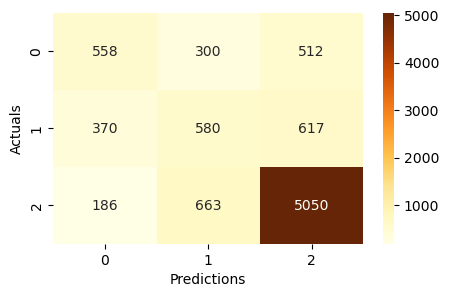

In [24]:
# fit model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)
dt.fit(X_train_smote, y_train_smote)

# predict
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Random Forest

              precision    recall  f1-score   support

           0       0.53      0.41      0.46      1370
           1       0.40      0.38      0.39      1567
           2       0.82      0.87      0.84      5899

    accuracy                           0.71      8836
   macro avg       0.58      0.55      0.57      8836
weighted avg       0.70      0.71      0.70      8836



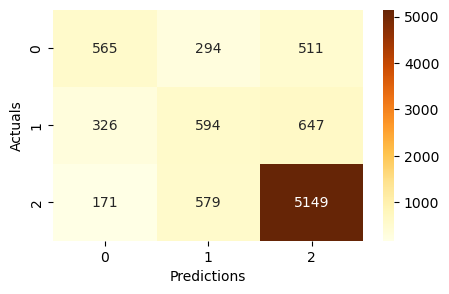

In [25]:
# fit model
rf = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# predict
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred);

### MLP

              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1370
           1       0.00      0.00      0.00      1567
           2       0.73      0.98      0.83      5899

    accuracy                           0.71      8836
   macro avg       0.43      0.45      0.43      8836
weighted avg       0.57      0.71      0.63      8836



array([[ 511,    1,  858],
       [ 270,    0, 1297],
       [ 130,    1, 5768]], dtype=int64)

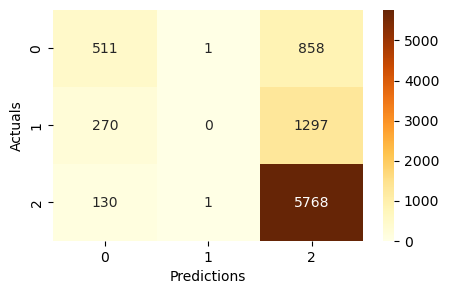

In [26]:
clf = MLPClassifier(random_state=42).fit(X_train_smote, y_train_smote)

# predict
y_pred = clf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

## Cân bằng bằng cách đánh trọng số

In [27]:
Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

3.431083844580777 1.6950899171549807


### Logistic Regression

              precision    recall  f1-score   support

           0       0.53      0.42      0.47      1370
           1       0.38      0.42      0.40      1567
           2       0.83      0.84      0.84      5899

    accuracy                           0.70      8836
   macro avg       0.58      0.56      0.57      8836
weighted avg       0.70      0.70      0.70      8836



array([[ 576,  332,  462],
       [ 345,  662,  560],
       [ 168,  753, 4978]], dtype=int64)

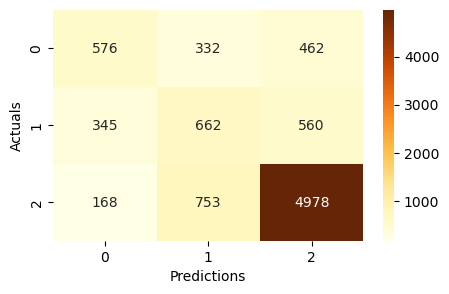

In [28]:
# fit model
lr = LogisticRegression(class_weight={0:r0, 1:r1, 2:1})
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### SVM

              precision    recall  f1-score   support

           0       0.57      0.29      0.38      1370
           1       0.41      0.22      0.29      1567
           2       0.77      0.95      0.85      5899

    accuracy                           0.72      8836
   macro avg       0.58      0.49      0.51      8836
weighted avg       0.67      0.72      0.68      8836



array([[ 395,  290,  685],
       [ 199,  347, 1021],
       [  96,  217, 5586]], dtype=int64)

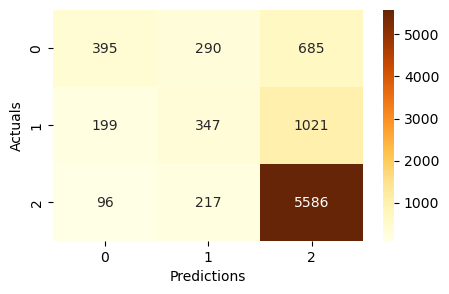

In [29]:
# fit model
svc = LinearSVC(class_weight={0:r0, 1:r1, 2:1})
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Decision Tree

              precision    recall  f1-score   support

           0       0.51      0.37      0.43      1370
           1       0.38      0.41      0.40      1567
           2       0.82      0.85      0.83      5899

    accuracy                           0.70      8836
   macro avg       0.57      0.54      0.55      8836
weighted avg       0.69      0.70      0.69      8836



array([[ 505,  361,  504],
       [ 296,  650,  621],
       [ 189,  713, 4997]], dtype=int64)

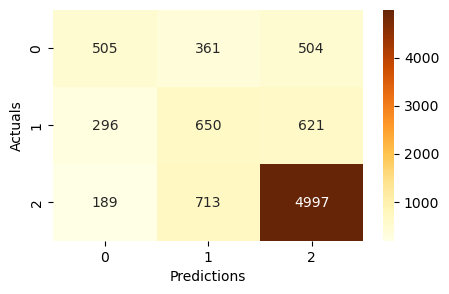

In [30]:
# fit model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42, class_weight={0:r0, 1:r1, 2:1})
dt.fit(X_train, y_train)

# predict
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

### Random Forest

              precision    recall  f1-score   support

           0       0.53      0.42      0.47      1370
           1       0.40      0.39      0.40      1567
           2       0.82      0.87      0.84      5899

    accuracy                           0.71      8836
   macro avg       0.59      0.56      0.57      8836
weighted avg       0.70      0.71      0.71      8836



array([[ 578,  300,  492],
       [ 331,  608,  628],
       [ 178,  600, 5121]], dtype=int64)

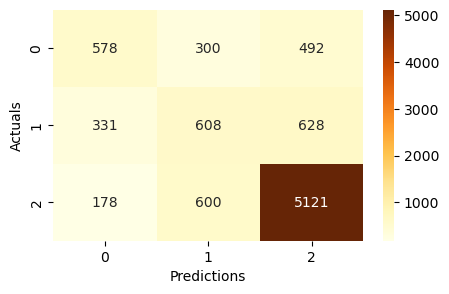

In [31]:
# fit model
rf = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=50, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_cm(y_test, y_pred)

## Mô hình cho từng khoa

### KHMT

In [32]:
df_train1 = df_train[df_train["khoa_KHMT"]==1]
df_test1 = df_test[df_test["khoa_KHMT"]==1]

In [33]:
# Data preparation
X_train1, X_test1 = df_train1[input], df_test1[input]
y_train1, y_test1 = df_train1[output], df_test1[output]

In [34]:
Count_class_0 = y_train1.value_counts()[0] 
Count_class_1 = y_train1.value_counts()[1] 
Count_class_2 = y_train1.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 

              precision    recall  f1-score   support

           0       0.60      0.43      0.50       236
           1       0.35      0.40      0.37       175
           2       0.82      0.86      0.84       814

    accuracy                           0.71      1225
   macro avg       0.59      0.56      0.57      1225
weighted avg       0.71      0.71      0.71      1225



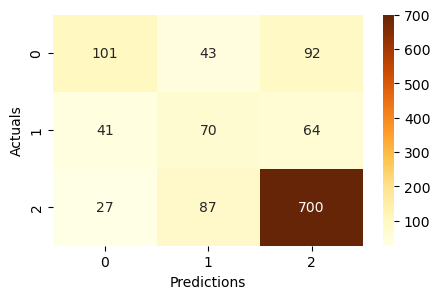

In [35]:
# fit model
rf1 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf1.fit(X_train1, y_train1)

# predict
y_pred1 = rf1.predict(X_test1)

# classification report
print(classification_report(y_test1, y_pred1))

# confusion matrix
plot_cm(y_test1, y_pred1);

### CNPM

In [36]:
df_train2 = df_train[df_train["khoa_CNPM"]==1]
df_test2 = df_test[df_test["khoa_CNPM"]==1]

In [37]:
# Data preparation
X_train2, X_test2 = df_train2[input], df_test2[input]
y_train2, y_test2 = df_train2[output], df_test2[output]

In [38]:
Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

3.431083844580777 1.6950899171549807


              precision    recall  f1-score   support

           0       0.58      0.47      0.52       288
           1       0.31      0.39      0.35       223
           2       0.83      0.83      0.83       962

    accuracy                           0.69      1473
   macro avg       0.57      0.56      0.57      1473
weighted avg       0.70      0.69      0.70      1473



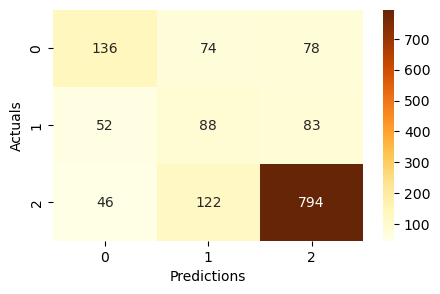

In [39]:
# fit model
rf2 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf2.fit(X_train2, y_train2)

# predict
y_pred2 = rf2.predict(X_test2)

# classification report
print(classification_report(y_test2, y_pred2))

# confusion matrix
plot_cm(y_test2, y_pred2);

### KTTT

3.431083844580777 1.6950899171549807
              precision    recall  f1-score   support

           0       0.64      0.27      0.38       163
           1       0.36      0.32      0.34       177
           2       0.85      0.94      0.89      1109

    accuracy                           0.79      1449
   macro avg       0.62      0.51      0.54      1449
weighted avg       0.77      0.79      0.77      1449



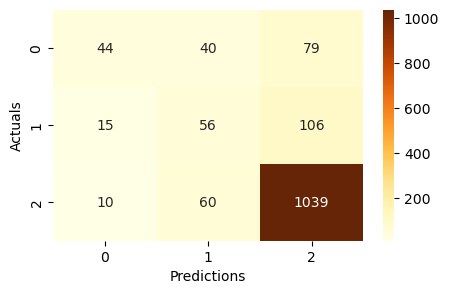

In [40]:
df_train3 = df_train[df_train["khoa_KTTT"]==1]
df_test3 = df_test[df_test["khoa_KTTT"]==1]

# Data preparation
X_train3, X_test3 = df_train3[input], df_test3[input]
y_train3, y_test3 = df_train3[output], df_test3[output]

Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

# fit model
rf3 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf3.fit(X_train3, y_train3)

# predict
y_pred3 = rf3.predict(X_test3)

# classification report
print(classification_report(y_test3, y_pred3))

# confusion matrix
plot_cm(y_test3, y_pred3);


### HTTT

3.431083844580777 1.6950899171549807
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       219
           1       0.44      0.52      0.48       432
           2       0.85      0.82      0.83      1309

    accuracy                           0.70      1960
   macro avg       0.56      0.56      0.56      1960
weighted avg       0.71      0.70      0.70      1960



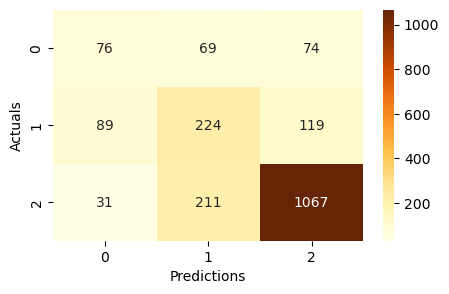

In [41]:
### CNPM
df_train4 = df_train[df_train["khoa_HTTT"]==1]
df_test4 = df_test[df_test["khoa_HTTT"]==1]

# Data preparation
X_train4, X_test4 = df_train4[input], df_test4[input]
y_train4, y_test4 = df_train4[output], df_test4[output]

Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

# fit model
rf4 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf4.fit(X_train4, y_train4)

# predict
y_pred4 = rf4.predict(X_test4)

# classification report
print(classification_report(y_test4, y_pred4))

# confusion matrix
plot_cm(y_test4, y_pred4);


### KTMT

3.431083844580777 1.6950899171549807
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       159
           1       0.45      0.42      0.43       232
           2       0.80      0.80      0.80       568

    accuracy                           0.67       959
   macro avg       0.58      0.59      0.58       959
weighted avg       0.67      0.67      0.67       959



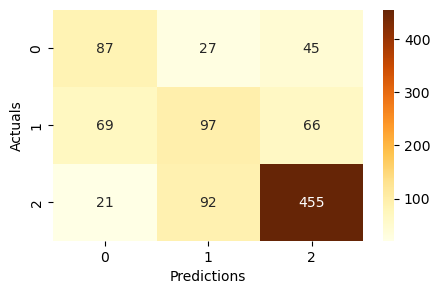

In [42]:
df_train5 = df_train[df_train["khoa_KTMT"]==1]
df_test5 = df_test[df_test["khoa_KTMT"]==1]

# Data preparation
X_train5, X_test5 = df_train5[input], df_test5[input]
y_train5, y_test5 = df_train5[output], df_test5[output]

Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

# fit model
rf5 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf5.fit(X_train5, y_train5)

# predict
y_pred5 = rf5.predict(X_test5)

# classification report
print(classification_report(y_test5, y_pred5))

# confusion matrix
plot_cm(y_test5, y_pred5);


### MMT&TT

3.431083844580777 1.6950899171549807
              precision    recall  f1-score   support

           0       0.57      0.43      0.49       305
           1       0.38      0.36      0.37       328
           2       0.79      0.86      0.83      1137

    accuracy                           0.69      1770
   macro avg       0.58      0.55      0.56      1770
weighted avg       0.68      0.69      0.68      1770



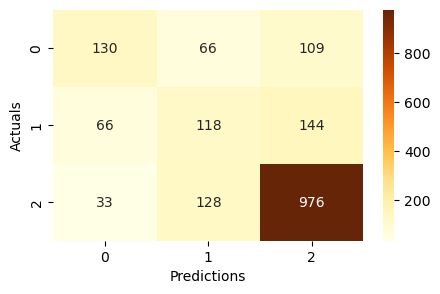

In [43]:
### CNPM
df_train6 = df_train[df_train["khoa_MMT&TT"]==1]
df_test6 = df_test[df_test["khoa_MMT&TT"]==1]

# Data preparation
X_train6, X_test6 = df_train6[input], df_test6[input]
y_train6, y_test6 = df_train6[output], df_test6[output]

Count_class_0 = y_train.value_counts()[0] 
Count_class_1 = y_train.value_counts()[1] 
Count_class_2 = y_train.value_counts()[2] 

r0 = Count_class_2/Count_class_0 
r1 = Count_class_2/Count_class_1 
print(r0, r1)

# fit model
rf6 = RandomForestClassifier(n_estimators=600, max_depth=10, min_samples_split=100, random_state=42, class_weight={0:r0, 1:r1, 2:1})
rf6.fit(X_train6, y_train6)

# predict
y_pred6 = rf6.predict(X_test6)

# classification report
print(classification_report(y_test6, y_pred6))

# confusion matrix
plot_cm(y_test6, y_pred6);


In [44]:
rf.feature_names_in_

array(['gioitinh', 'hedt_ CNTN', 'hedt_ KSTN', 'khoahoc', 'namhoc',
       'dtbtl', 'drltl', 'dtbhk_truoc', 'drlhk_truoc',
       'somon_khongdat_hktruoc'], dtype=object)

In [55]:
f1_sum = recall_score(y_test1, y_pred1, average="macro") + recall_score(y_test2, y_pred2, average="macro")+recall_score(y_test3, y_pred3, average="macro")+recall_score(y_test4, y_pred4, average="macro")+recall_score(y_test5, y_pred5, average="macro")+recall_score(y_test6, y_pred6, average="macro")
f1_sum/6

0.5552619877073788

0.5623863025021419

# Export model.pkl

In [24]:
import joblib

joblib.dump(rf, "clf.pkl")

['clf.pkl']

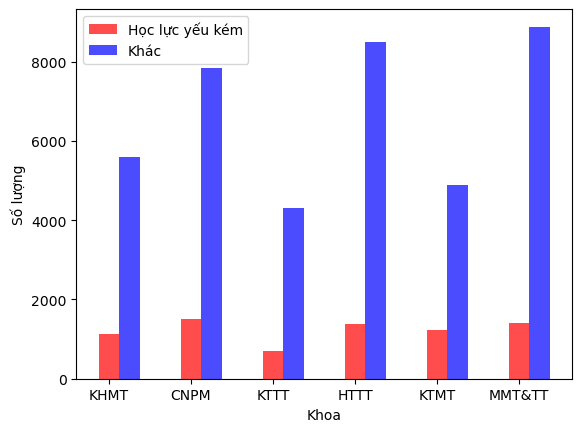

In [93]:
N = 6
ind = np.arange(N) 
width = 0.25

yvals = [1122, 1497, 704, 1379, 1224, 1409]
bar2 = plt.bar(ind+width, yvals, width, alpha=0.7, color='r')
  
zvals = [5589, 7841, 4318, 8496, 4893, 8880]
bar3 = plt.bar(ind+width*2, zvals, width, alpha=0.7, color = 'b')

# xvals = [6708, 9338, 5022, 9875, 6117, 10289]
# bar1 = plt.bar(ind, xvals, width, color = 'r')
  
plt.xlabel("Khoa")
plt.ylabel('Số lượng')
  
plt.xticks(ind+width,['KHMT', 'CNPM', 'KTTT', 'HTTT', 'KTMT', 'MMT&TT'])
plt.legend( (bar2, bar3), ('Học lực yếu kém', 'Khác') )
plt.show()

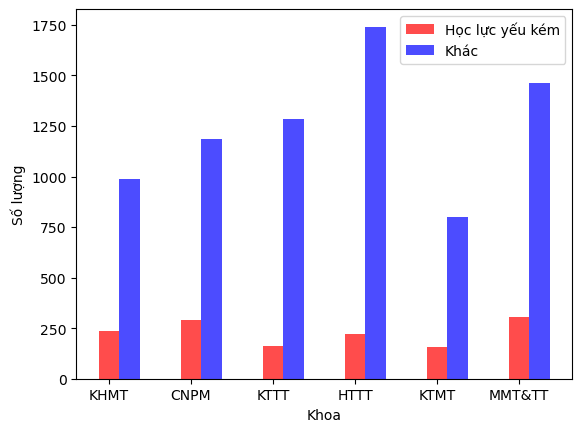

In [107]:
N = 6
ind = np.arange(N) 
width = 0.25

yvals = [236, 288, 163, 219, 159, 305]
bar2 = plt.bar(ind+width, yvals, width, alpha=0.7, color='r')
  
zvals = [989, 1185, 1286, 1741, 800, 1465]
bar3 = plt.bar(ind+width*2, zvals, width, alpha=0.7, color = 'b')

# xvals = [6708, 9338, 5022, 9875, 6117, 10289]
# bar1 = plt.bar(ind, xvals, width, color = 'r')
  
plt.xlabel("Khoa")
plt.ylabel('Số lượng')
  
plt.xticks(ind+width,['KHMT', 'CNPM', 'KTTT', 'HTTT', 'KTMT', 'MMT&TT'])
plt.legend( (bar2, bar3), ('Học lực yếu kém', 'Khác') )
plt.show()

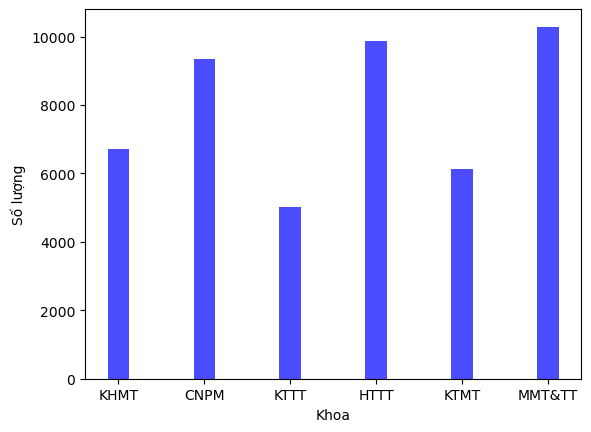

In [23]:
N = 6
ind = np.arange(N) 
width = 0.25

# yvals = [236, 288, 163, 219, 159, 305]
# bar2 = plt.bar(ind+width, yvals, width, alpha=0.7, color='r')
  
zvals = [6708, 9338, 5022, 9875, 6117, 10289]
bar3 = plt.bar(ind+width, zvals, width, alpha=0.7, color = 'b')

# xvals = [6708, 9338, 5022, 9875, 6117, 10289]
# bar1 = plt.bar(ind, xvals, width, color = 'r')
  
plt.xlabel("Khoa")
plt.ylabel('Số lượng')
  
plt.xticks(ind+width,['KHMT', 'CNPM', 'KTTT', 'HTTT', 'KTMT', 'MMT&TT'])
plt.show()